# Dự đoán giá xe ô tô cũ

Trong dự án dự đoán giá xe ô tô cũ này, chúng em sẽ thu thập và phân tích dữ liệu thông tin về các xe cũ từ (https://bonbanh.com/). Dữ liệu chứa các trường sau:
* ID: String
* Hãng xe: String
* Năm sản xuất: Int
* Tình trạng: String
* Số Km đã đi: String
* Xuất xứ: String
* Kiểu dáng: String
* Hộp số: String 
* Động cơ: Sring
* Số chỗ ngồi: Int
* Dẫn động: String
* Ngày đăng: String
* Địa điểm: String
* Giá: Float

Ở phần này của dự án ta sẽ đi nghiên cứu thực hiện các bước xử lý và trực quan hóa các dữ liệu trên

### Chuẩn bị và crawl dữ liệu

Import các thư viện cần thiết
- `helpper`: file python tự viết để hỗ trợ, chứa các hàm thực hiện các công việc chuyên biệt
- `matplotlib`: Tạo và tùy chỉnh đồ thị và biểu đồ trong Python sử dụng thư viện Matplotlib.
- `random`: Tạo các số ngẫu nhiên hoặc lựa chọn một phần tử ngẫu nhiên từ một dãy dữ liệu.
- `pandas`: Cung cấp các cấu trúc dữ liệu và công cụ phân tích dữ liệu 
- `numpy`: Cung cấp các công cụ để làm việc với mảng và ma trận đa chiều
- `seaborn`: Hỗ trợ trực quan hóa dữ liệu
- `sklearn.preprocessing`: Cung cấp các công cụ tiền xử lý dữ liệu cho học máy.

In [1]:
import helpper
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing

Biến KEY là khóa của proxy để đổi IP khi thực hiện crawl lượng lớn dữ liệu mà không bị chặn (trường hợp demo crawl ít không cần sử dụng chức năng này)

Hàm crawl_carID thực hiện thu thập các địa chỉ URL của các xe hơi từ một trang web từ trang firstPage đến trang lastPage và lưu chúng vào một tệp đầu ra
- Lấy danh sách car_ids theo từng trang (demo với 2 trang đầu)

In [2]:
KEY = 'UK-5f803cc4-2a25-456d-950c-c31ef96af2b6'
crawller = helpper.crawller(KEY)
crawller.crawl_carID(outputFile='car_ids_test.txt', firstPage=1, lastPage=2)

page: 2, records: 20 

page: 1, records: 20 

Hoàn thành


Hàm crawl_carDetails thu thập thông tin chi tiết về các xe từ các địa chỉ URL được xác định bằng cách kết hợp car_ids từ tệp đầu vào và url trang chủ của web và sau đó lưu thông tin này vào tệp đầu ra
- Thực hiện crawl chi tiết từng xe (demo với 2 trang đầu)

In [3]:
crawller.crawl_carDetails(inputFile='car_ids_test.txt', outputFile='rawdata_test2.csv')

crawling:  1
crawling:  2
crawling:  3
crawling:  4
crawling:  5
crawling:  6
crawling:  7
crawling:  8
crawling:  9
crawling:  10
crawling:  11
crawling:  12
crawling:  13
crawling:  14
crawling:  15
crawling:  16
crawling:  17
crawling:  18
crawling:  19
crawling:  20
crawling:  21
crawling:  22
crawling:  23
crawling:  24
crawling:  25
crawling:  26
crawling:  27
crawling:  28
crawling:  29
crawling:  30
crawling:  31
crawling:  32
crawling:  33
crawling:  34
crawling:  35
crawling:  36
crawling:  37
crawling:  38
crawling:  39
crawling:  40
Dữ liệu đã được lưu vào file CSV thành công!


### Tiền xử lý dữ liệu

Đọc dữ liệu từ file raw data lưu vào dataframe để chỉnh sửa

In [2]:
data_raw = pd.read_csv('raw data.csv', encoding='utf-8')
data_raw.head(3)

,ID,Hãng xe,Năm sản xuất,Tình trạng,Số Km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Động cơ,Số chỗ ngồi,Dẫn động,Ngày đăng,Địa điểm,Giá
0,xe-ford-everest-ambiente-2.0l-4x2-at-2022-5541828,Ford,2022,Xe đã dùng,"30,000 Km",Nhập khẩu,SUV,Số tự động,Dầu 2.0 L,7 chỗ,RFD - Dẫn động cầu sau,3/4/2024,Hà Nội,1.050000e+09
1,xe-mercedes_benz-glb-200-amg-2024-4925370,Mercedes Benz,2024,Xe mới,0,Nhập khẩu,SUV,Số tự động,Xăng 1.3 L,7 chỗ,RFD - Dẫn động cầu sau,3/4/2024,Hà Nội,2.089000e+09
2,xe-toyota-camry-le-2.4-2007-5537945,Toyota,2007,Xe đã dùng,0 Km,Nhập khẩu,Sedan,Số tự động,Xăng 2.4 L,5 chỗ,FWD - Dẫn động cầu trước,3/4/2024,Thanh Hóa,2.950000e+08


Chuẩn hóa cột Số Km đã đi loại bỏ các kí tự và chuyển về kiểu Int

In [32]:
data_clean = data_raw.copy()

data_clean['Số Km đã đi'] = data_clean['Số Km đã đi'].apply(lambda x: str(x).replace(',', '').replace(' Km', '') if isinstance(x, str) else x)
data_clean['Số Km đã đi'] = data_clean['Số Km đã đi'].fillna('')
data_clean['Số Km đã đi'] = pd.to_numeric(data_clean['Số Km đã đi'], errors='coerce').astype('Int64')
data_clean.to_csv("clean data.csv", index=False)

data_clean.head(3)

,ID,Hãng xe,Năm sản xuất,Tình trạng,Số Km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Động cơ,Số chỗ ngồi,Dẫn động,Ngày đăng,Địa điểm,Giá
0,xe-ford-everest-ambiente-2.0l-4x2-at-2022-5541828,Ford,2022,Xe đã dùng,30000,Nhập khẩu,SUV,Số tự động,Dầu 2.0 L,7 chỗ,RFD - Dẫn động cầu sau,3/4/2024,Hà Nội,1.050000e+09
1,xe-mercedes_benz-glb-200-amg-2024-4925370,Mercedes Benz,2024,Xe mới,0,Nhập khẩu,SUV,Số tự động,Xăng 1.3 L,7 chỗ,RFD - Dẫn động cầu sau,3/4/2024,Hà Nội,2.089000e+09
2,xe-toyota-camry-le-2.4-2007-5537945,Toyota,2007,Xe đã dùng,0,Nhập khẩu,Sedan,Số tự động,Xăng 2.4 L,5 chỗ,FWD - Dẫn động cầu trước,3/4/2024,Thanh Hóa,2.950000e+08


Xóa những dòng trống hoặc thiếu nhiều hơn 3 trường dữ liệu từ file raw data và đếm số dòng đã bị xóa

In [33]:
raw_cnt = 0
clean_cnt = 0
data_clean = data_clean[data_clean.apply(lambda row: len(row.dropna()) >= 12, axis=1)]
data_clean.to_csv('clean data.csv', index=False)

with open("raw data.csv", "r", encoding='utf-8') as f:
    raw_cnt = sum(1 for _ in f)
with open("clean data.csv", "r", encoding='utf-8') as f:
    clean_cnt = sum(1 for _ in f)
print("Số hàng bị xóa:" ,raw_cnt - clean_cnt)

Số hàng bị xóa: 72


Chuyển đổi cột giá sang đơn vị triệu bằng cách chia cho 1000000

In [34]:
data_clean.loc[:, 'Giá'] = data_clean['Giá']/10**6
data_clean.to_csv("clean data.csv", index=False)
data_clean.head(3)

,ID,Hãng xe,Năm sản xuất,Tình trạng,Số Km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Động cơ,Số chỗ ngồi,Dẫn động,Ngày đăng,Địa điểm,Giá
0,xe-ford-everest-ambiente-2.0l-4x2-at-2022-5541828,Ford,2022,Xe đã dùng,30000,Nhập khẩu,SUV,Số tự động,Dầu 2.0 L,7 chỗ,RFD - Dẫn động cầu sau,3/4/2024,Hà Nội,1050.0
1,xe-mercedes_benz-glb-200-amg-2024-4925370,Mercedes Benz,2024,Xe mới,0,Nhập khẩu,SUV,Số tự động,Xăng 1.3 L,7 chỗ,RFD - Dẫn động cầu sau,3/4/2024,Hà Nội,2089.0
2,xe-toyota-camry-le-2.4-2007-5537945,Toyota,2007,Xe đã dùng,0,Nhập khẩu,Sedan,Số tự động,Xăng 2.4 L,5 chỗ,FWD - Dẫn động cầu trước,3/4/2024,Thanh Hóa,295.0


Sửa các địa điểm bị lỗi (có cả Huế và Hà Nội)

In [35]:
data_clean.loc[:,'Địa điểm'] = data_clean['Địa điểm'].apply(lambda x: 'Hà Nội' if type(x)==str and 'Hà Nội' in x and 'Huế' in x  else x)
data_clean.to_csv("clean data.csv", index=False)
data_clean.head(3)

,ID,Hãng xe,Năm sản xuất,Tình trạng,Số Km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Động cơ,Số chỗ ngồi,Dẫn động,Ngày đăng,Địa điểm,Giá
0,xe-ford-everest-ambiente-2.0l-4x2-at-2022-5541828,Ford,2022,Xe đã dùng,30000,Nhập khẩu,SUV,Số tự động,Dầu 2.0 L,7 chỗ,RFD - Dẫn động cầu sau,3/4/2024,Hà Nội,1050.0
1,xe-mercedes_benz-glb-200-amg-2024-4925370,Mercedes Benz,2024,Xe mới,0,Nhập khẩu,SUV,Số tự động,Xăng 1.3 L,7 chỗ,RFD - Dẫn động cầu sau,3/4/2024,Hà Nội,2089.0
2,xe-toyota-camry-le-2.4-2007-5537945,Toyota,2007,Xe đã dùng,0,Nhập khẩu,Sedan,Số tự động,Xăng 2.4 L,5 chỗ,FWD - Dẫn động cầu trước,3/4/2024,Thanh Hóa,295.0


Lọc dữ liệu trùng lặp

In [36]:
print('Dữ liệu trùng lặp trước khi lọc: ',data_clean.duplicated().sum())
data_clean = data_clean.drop_duplicates()
data_clean.to_csv("clean data.csv", index=False)
print('Dữ liệu trùng lặp sau khi lọc: ', data_clean.duplicated().sum())

Dữ liệu trùng lặp trước khi lọc:  1053
Dữ liệu trùng lặp sau khi lọc:  0


Chỉnh sửa biến Ngày đăng chỉ lấy tháng và năm

In [37]:
data_clean['Ngày đăng'] = data_clean['Ngày đăng'].astype(str)
date_parts = data_clean['Ngày đăng'].str.split('/')
months_years = []
for date_part in date_parts:
    month = date_part[1]
    year = date_part[2]
    months_years.append(f"{month}/{year}")
data_clean['Ngày đăng'] = months_years
data_clean.to_csv("clean data.csv", index=False)
data_clean.head(3)

,ID,Hãng xe,Năm sản xuất,Tình trạng,Số Km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Động cơ,Số chỗ ngồi,Dẫn động,Ngày đăng,Địa điểm,Giá
0,xe-ford-everest-ambiente-2.0l-4x2-at-2022-5541828,Ford,2022,Xe đã dùng,30000,Nhập khẩu,SUV,Số tự động,Dầu 2.0 L,7 chỗ,RFD - Dẫn động cầu sau,4/2024,Hà Nội,1050.0
1,xe-mercedes_benz-glb-200-amg-2024-4925370,Mercedes Benz,2024,Xe mới,0,Nhập khẩu,SUV,Số tự động,Xăng 1.3 L,7 chỗ,RFD - Dẫn động cầu sau,4/2024,Hà Nội,2089.0
2,xe-toyota-camry-le-2.4-2007-5537945,Toyota,2007,Xe đã dùng,0,Nhập khẩu,Sedan,Số tự động,Xăng 2.4 L,5 chỗ,FWD - Dẫn động cầu trước,4/2024,Thanh Hóa,295.0


Chuẩn hóa trường số chỗ ngồi xóa các kí tự và chuyển về dạng Int

In [38]:
data_clean['Số chỗ ngồi'] = data_clean['Số chỗ ngồi'].str.replace(' chỗ', '').astype(int)
data_clean.to_csv("clean data.csv", index=False)
data_clean.head(3)

,ID,Hãng xe,Năm sản xuất,Tình trạng,Số Km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Động cơ,Số chỗ ngồi,Dẫn động,Ngày đăng,Địa điểm,Giá
0,xe-ford-everest-ambiente-2.0l-4x2-at-2022-5541828,Ford,2022,Xe đã dùng,30000,Nhập khẩu,SUV,Số tự động,Dầu 2.0 L,7,RFD - Dẫn động cầu sau,4/2024,Hà Nội,1050.0
1,xe-mercedes_benz-glb-200-amg-2024-4925370,Mercedes Benz,2024,Xe mới,0,Nhập khẩu,SUV,Số tự động,Xăng 1.3 L,7,RFD - Dẫn động cầu sau,4/2024,Hà Nội,2089.0
2,xe-toyota-camry-le-2.4-2007-5537945,Toyota,2007,Xe đã dùng,0,Nhập khẩu,Sedan,Số tự động,Xăng 2.4 L,5,FWD - Dẫn động cầu trước,4/2024,Thanh Hóa,295.0


### Trực quan hóa dữ liệu đơn biến

Đọc dữ liệu từ file raw data và clean data và lưu vào các biến

In [3]:
data_raw = pd.read_csv("raw data.csv")
data_clean = pd.read_csv("clean data.csv")
%matplotlib inline
data_clean.head(3)

,ID,Hãng xe,Năm sản xuất,Tình trạng,Số Km đã đi,Xuất xứ,Kiểu dáng,Hộp số,Động cơ,Số chỗ ngồi,Dẫn động,Ngày đăng,Địa điểm,Giá
0,xe-ford-everest-ambiente-2.0l-4x2-at-2022-5541828,Ford,2022,Xe đã dùng,30000,Nhập khẩu,SUV,Số tự động,Dầu 2.0 L,7,RFD - Dẫn động cầu sau,4/2024,Hà Nội,1050.0
1,xe-mercedes_benz-glb-200-amg-2024-4925370,Mercedes Benz,2024,Xe mới,0,Nhập khẩu,SUV,Số tự động,Xăng 1.3 L,7,RFD - Dẫn động cầu sau,4/2024,Hà Nội,2089.0
2,xe-toyota-camry-le-2.4-2007-5537945,Toyota,2007,Xe đã dùng,0,Nhập khẩu,Sedan,Số tự động,Xăng 2.4 L,5,FWD - Dẫn động cầu trước,4/2024,Thanh Hóa,295.0


#### Thống kê các biến quan trọng

Thống kê top 20 hãng xe có số lượng lớn nhất

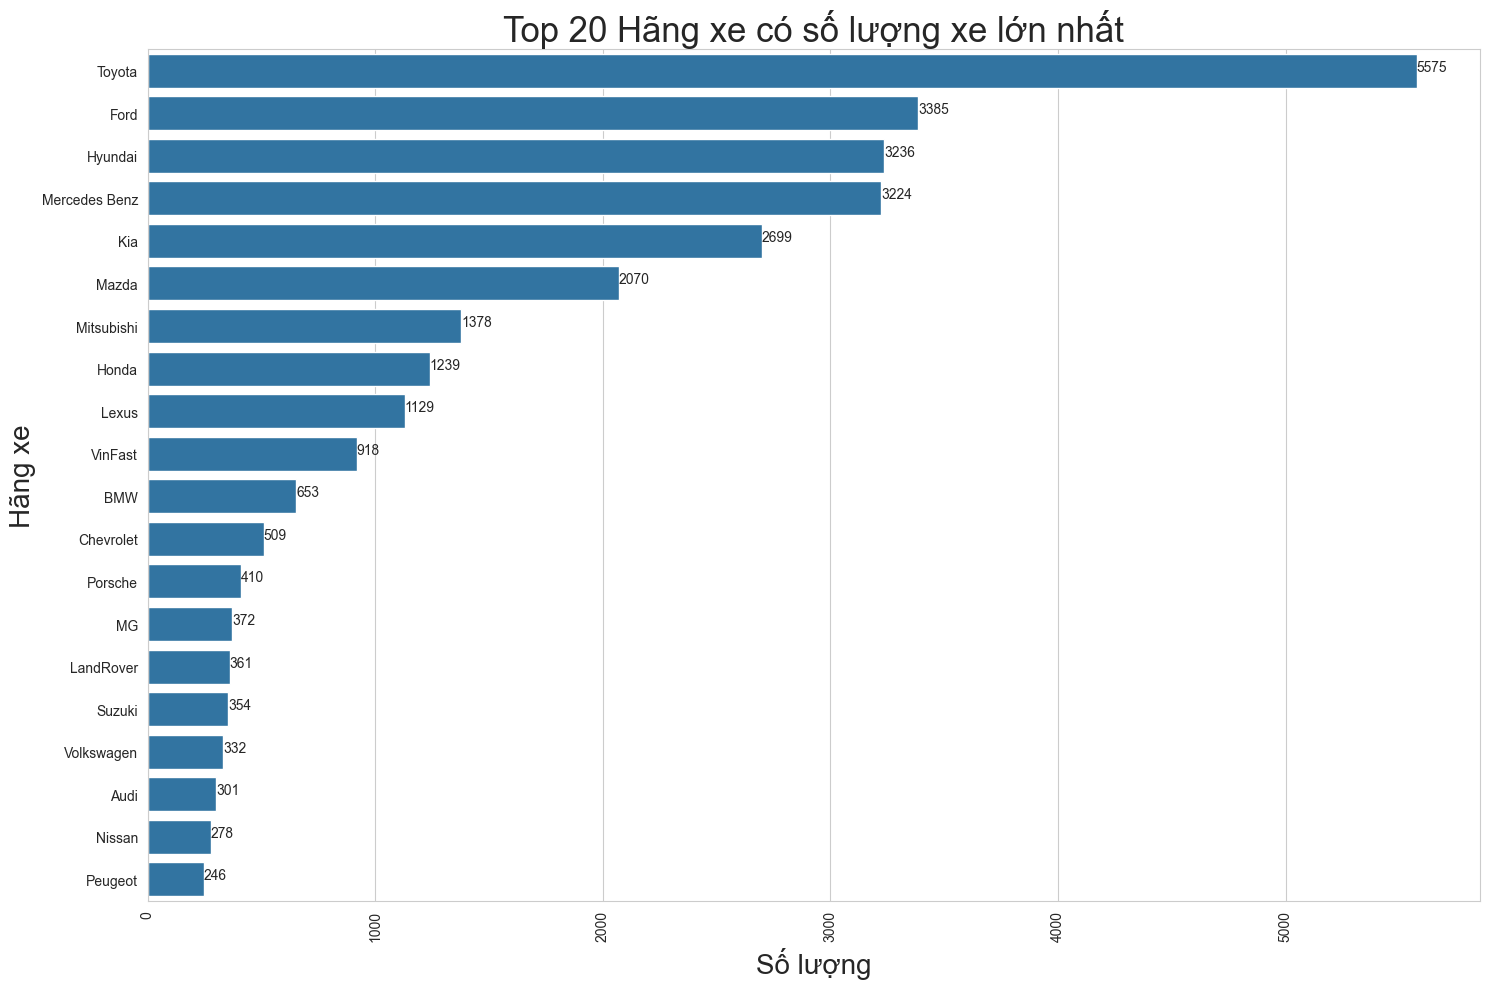

In [44]:
helpper.utilities.loc_barlot(data_clean,'Hãng xe', 20)

Thống kê các kiểu dáng xe thịnh hành

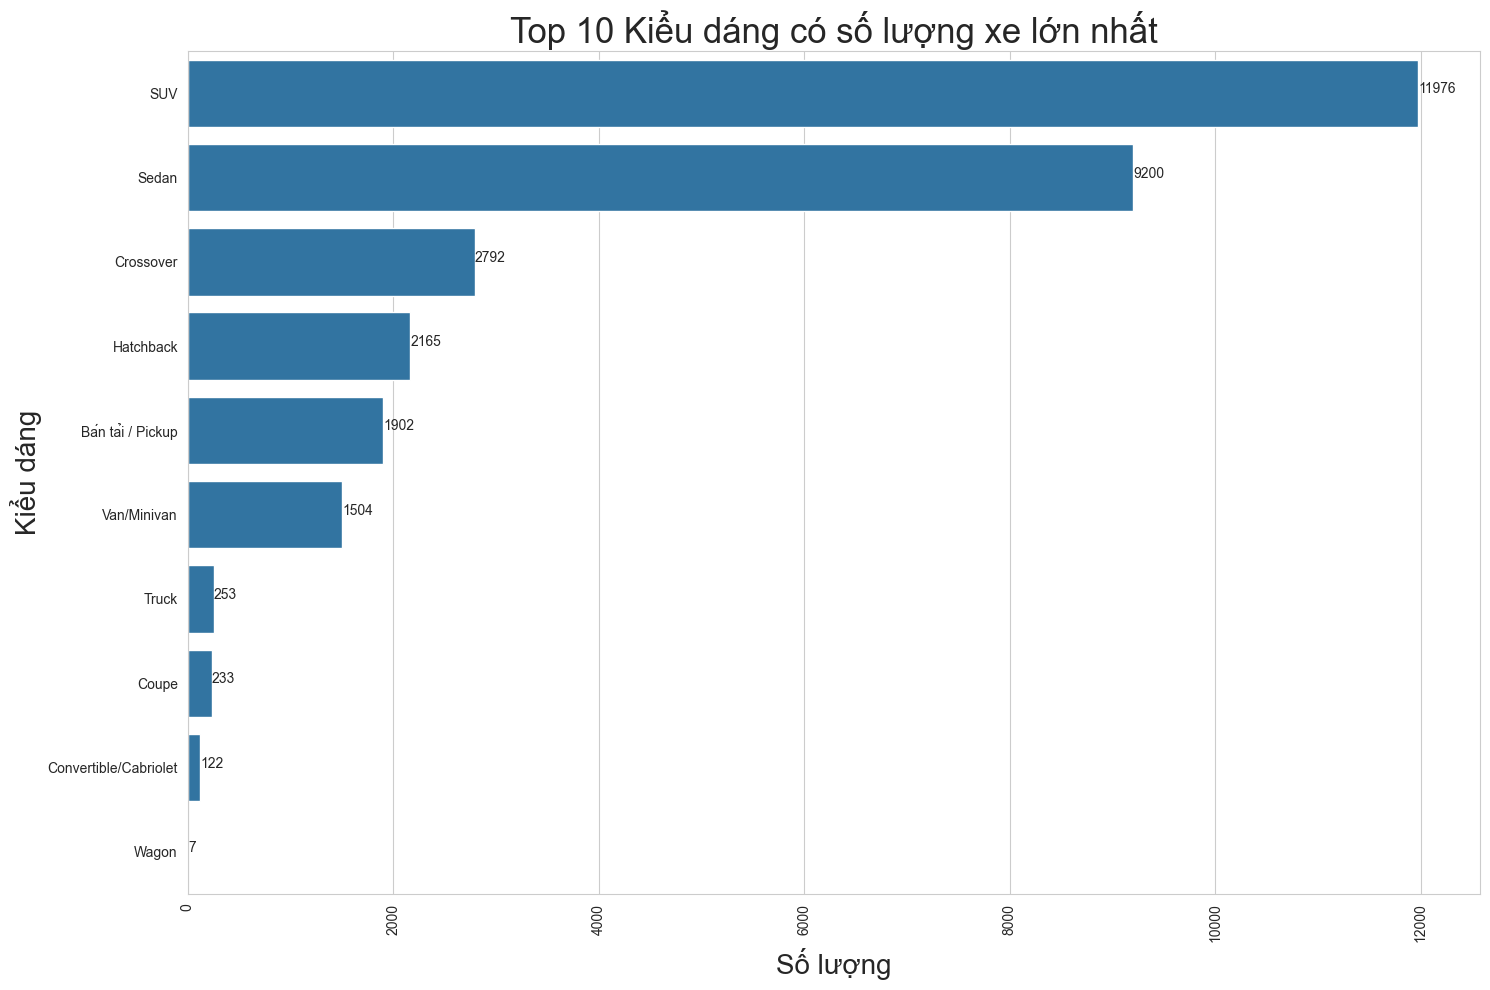

In [45]:
helpper.utilities.loc_barlot(data_clean,'Kiểu dáng', len(data_clean['Kiểu dáng'].value_counts()))

Đồ thị sự phân bố của giá xe

Text(0.5, 1.0, 'Sự phân bố của giá')

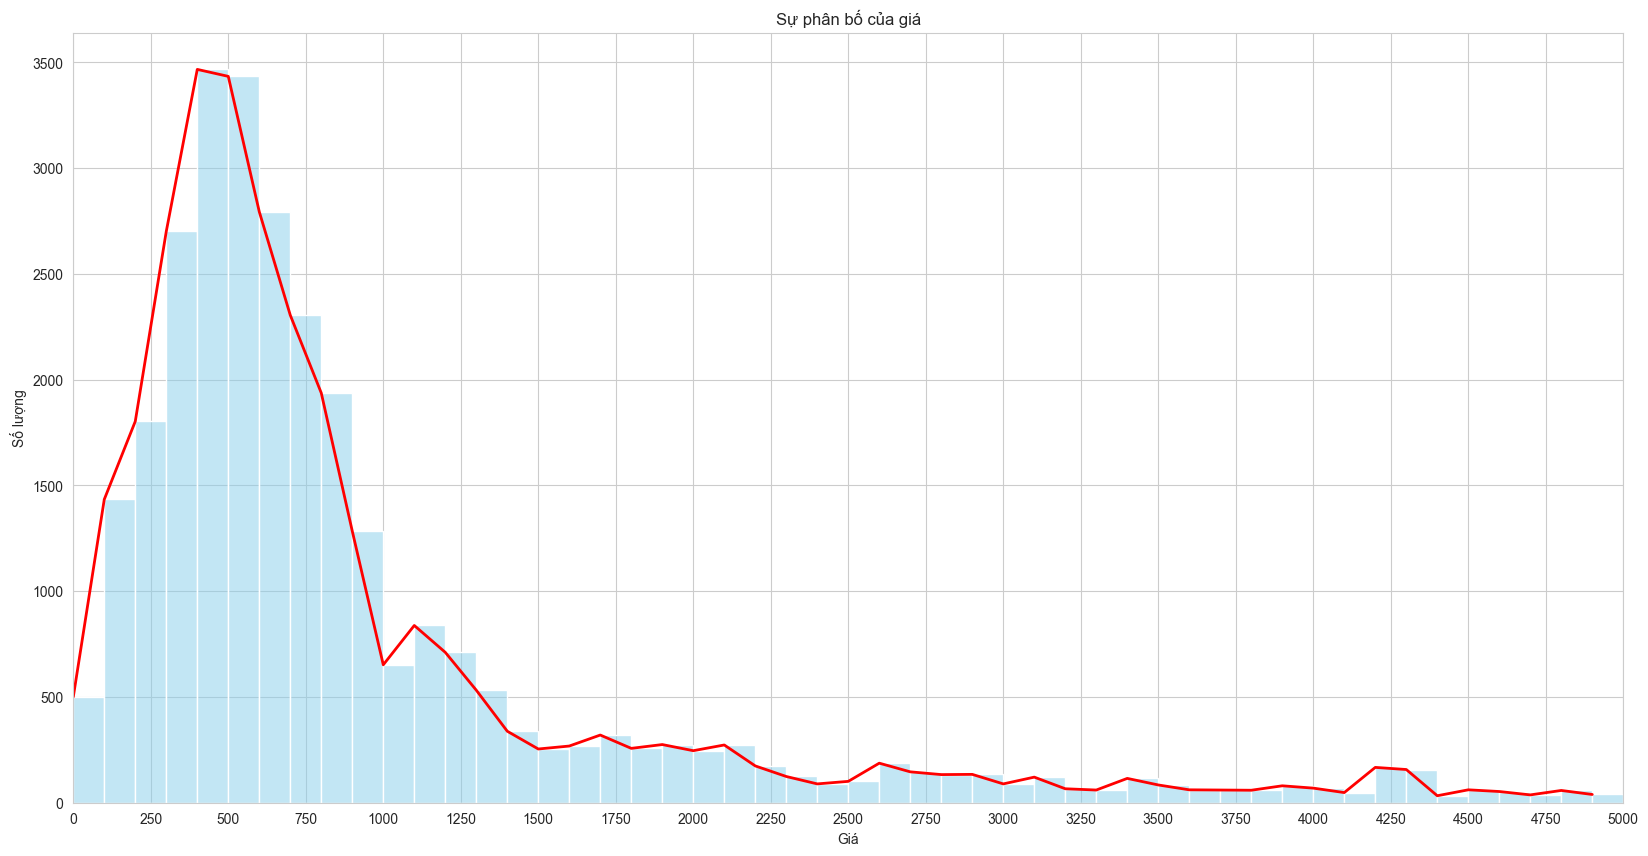

In [46]:
hist, bins = np.histogram(data_clean['Giá'], bins=np.arange(0, 5001, 100), density=False)

fig, ax = plt.subplots(figsize=(20, 10))

sns.lineplot(x=bins[:-1], y=hist, color='red', linewidth=2, ax=ax)

sns.histplot(data_clean, x='Giá', bins=bins, kde=False, color='skyblue', alpha=0.5, ax=ax, stat='count')
plt.xticks(ticks=np.arange(0, 5001, 250), labels=np.arange(0, 5001, 250))

plt.xlabel('Giá')
plt.ylabel('Số lượng')
plt.xlim(0, 5000)
plt.title('Sự phân bố của giá')

#### Xử lý dữ liệu trống 
Dữ liệu trống đối với trường địa điểm
- Thống kê 10 địa điểm có số lượng xe lớn nhất

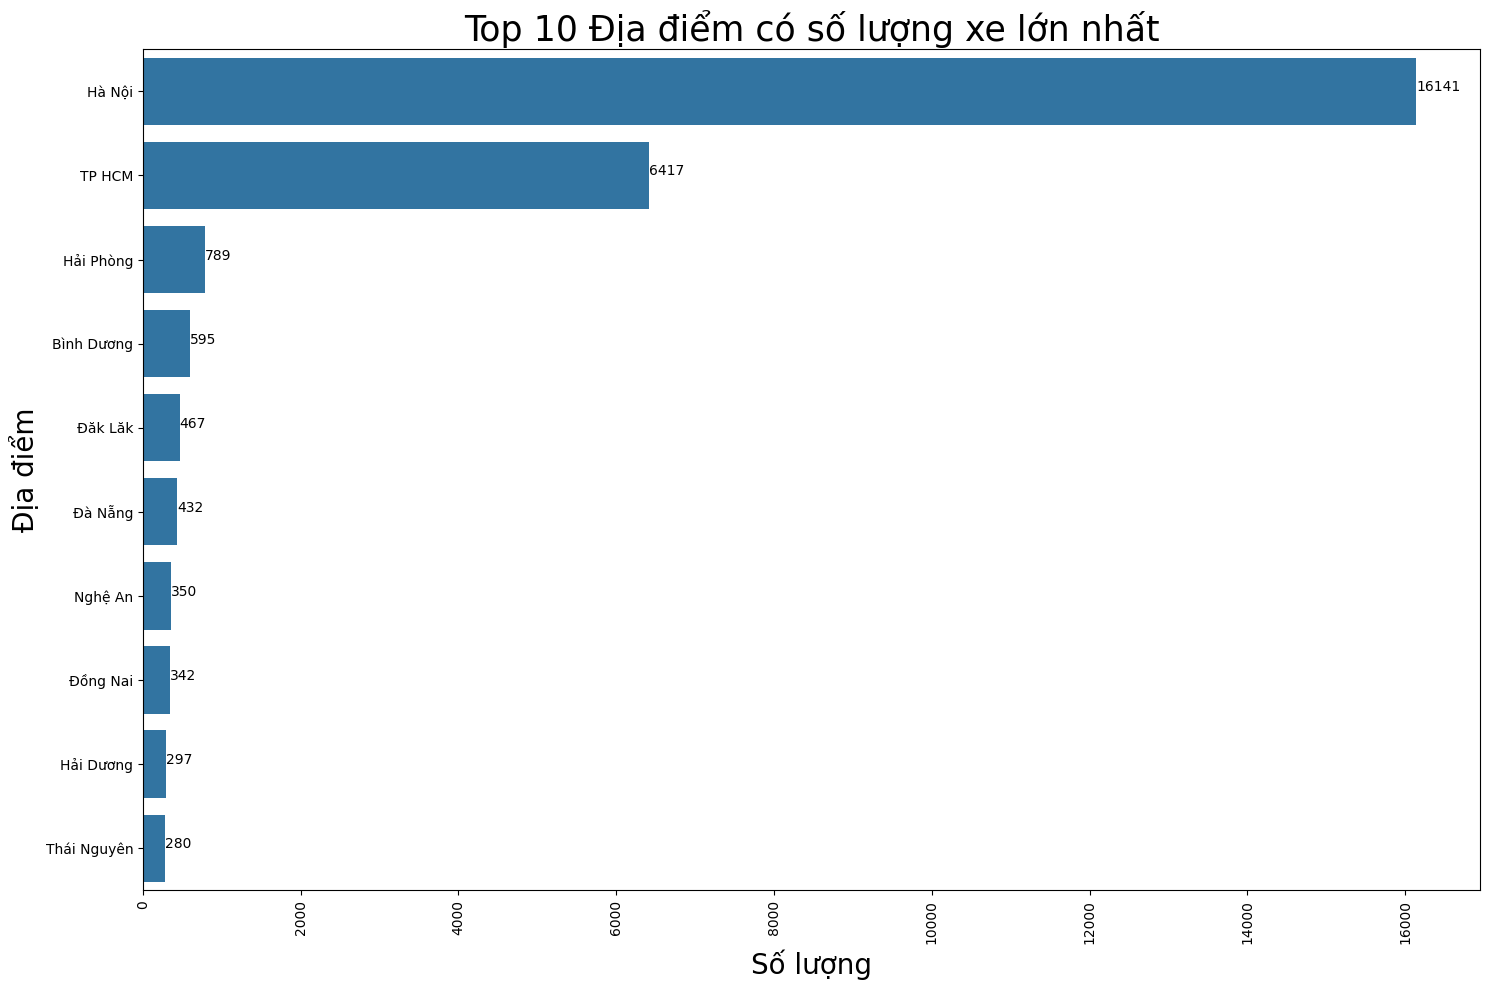

In [4]:
helpper.utilities.loc_barlot(data_clean,'Địa điểm', 10)

Dựa trên đồ thị ta thấy sự chênh lệch số lượng xe giữa 2 địa điểm Hà Nội và TP HCM so với các tỉnh thành khác nên ta sẽ thay thế giá trị dữ liệu trống bằng giá trị Hà Nội hoặc TP HCM

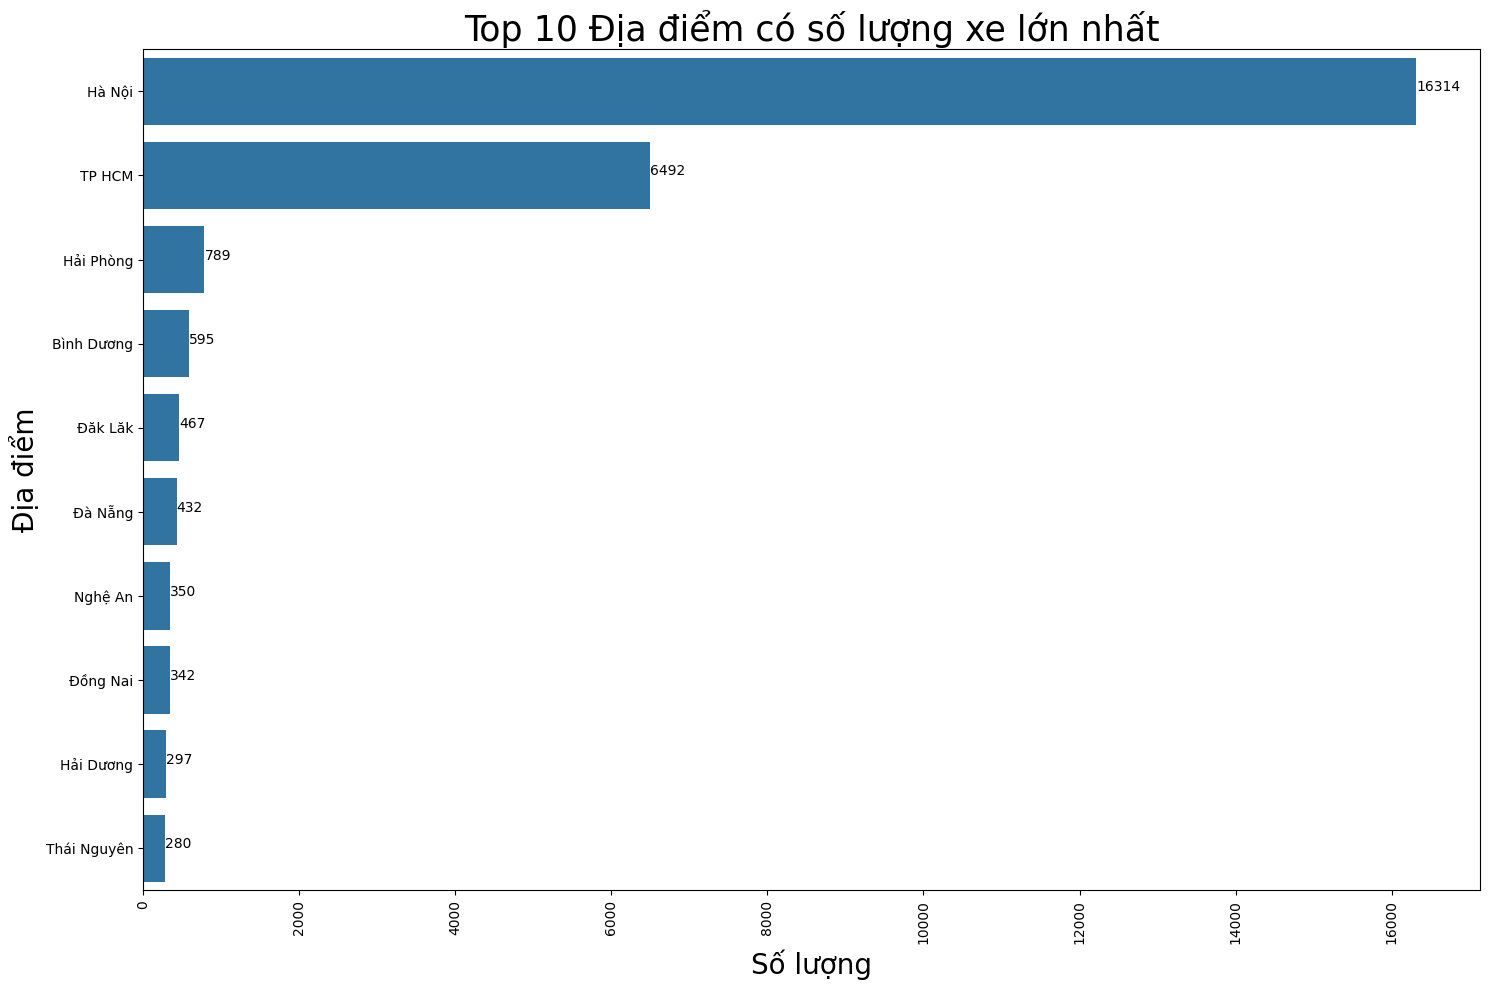

In [5]:
ratio_tphcm = 6/22
sum(data_clean['Địa điểm'].isna())
data_clean.loc[data_clean['Địa điểm'].isna(), 'Địa điểm'] = pd.Series(np.random.choice(['TP HCM', 'Hà Nội'], p=[ratio_tphcm, 1 - ratio_tphcm], size=len(data_clean)))
helpper.utilities.loc_barlot(data_clean,'Địa điểm', 10)
# data_clean.to_csv('clean data2.csv', index=False)

Thống kê sự phân bố của trường số Km đã đi

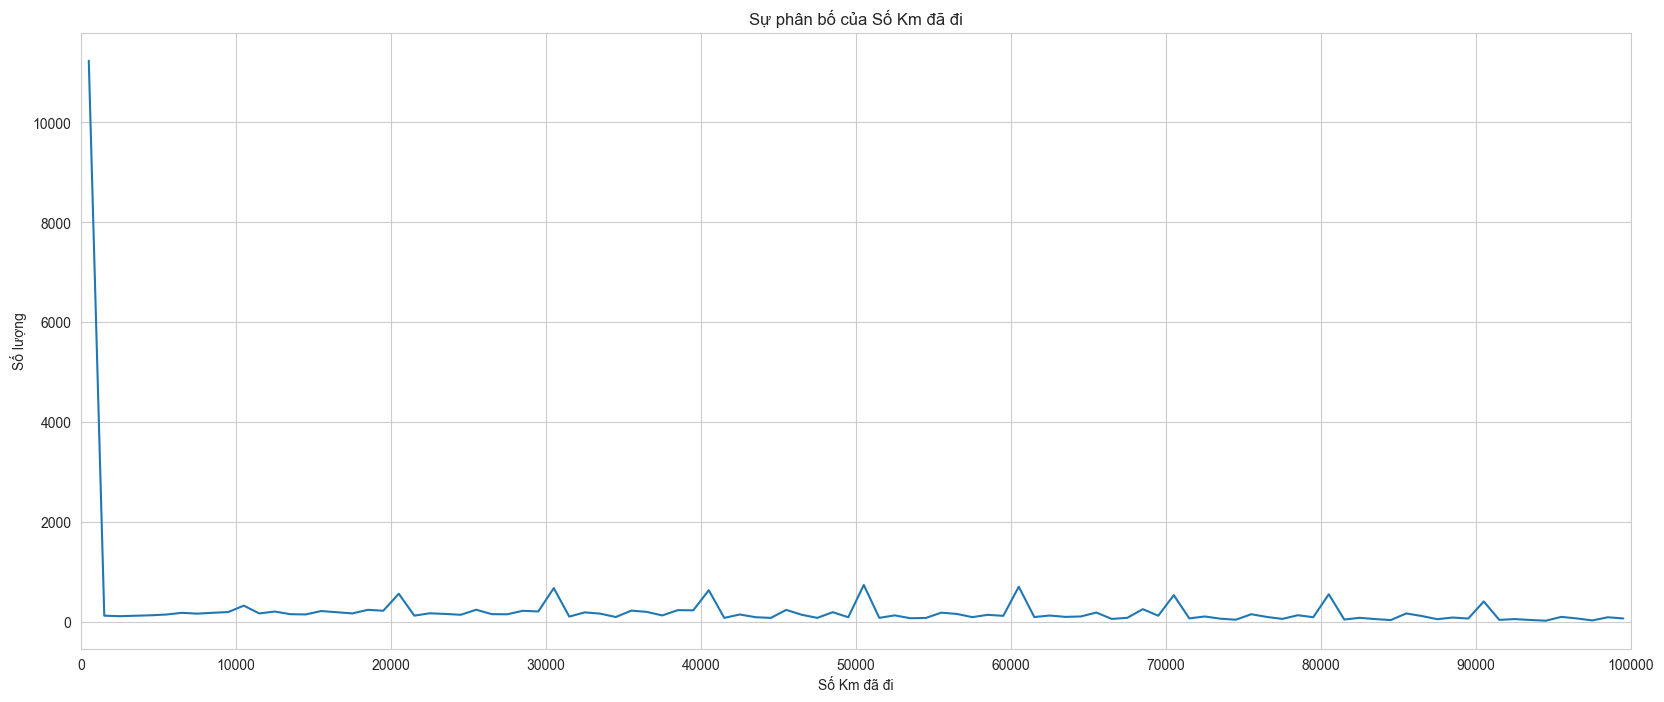

In [49]:
helpper.utilities.sokmdadi(data_clean)

Dựa trên đồ thị và số lượng xe có tình trạng mới mà số km đã đi bằng 0 thì sẽ thay thế giá trị 0 bằng trung bình của cột 'Số Km đã đi' bằng phương pháp bootstrap

C:\Users\ATi\AppData\Local\Temp\ipykernel_1788\3759169691.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '[96701.66677393 97062.41823689 62169.9589667  ... 76264.30656516
 86237.12694799 72206.19258497]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data_clean.loc[mask, 'Số Km đã đi'] = np.random.uniform(bootstrap_mean[2], bootstrap_mean[3], np.sum(mask))


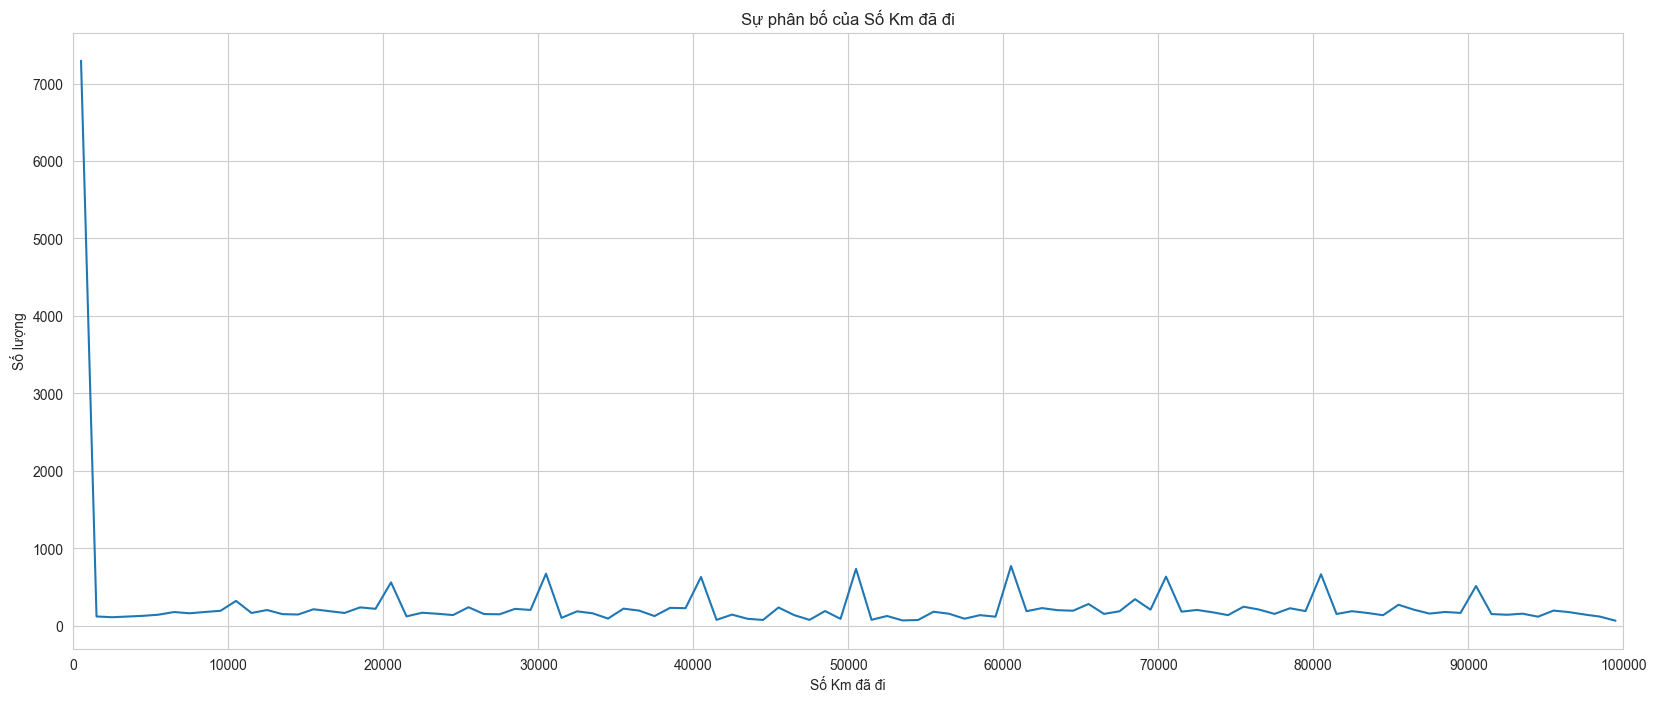

In [50]:
bootstrap_mean =  helpper.utilities.bootstrapmean(data_clean['Số Km đã đi'], n_iterations=1000, confidence_interval=95)
mask = (data_clean['Số Km đã đi'] == 0) & (data_clean['Tình trạng'] == 'Xe đã dùng')
data_clean.loc[mask, 'Số Km đã đi'] = np.random.uniform(bootstrap_mean[2], bootstrap_mean[3], np.sum(mask))
helpper.utilities.sokmdadi(data_clean)

### Trực quan hóa dữ liệu đa biến

- Biểu đồ giá xe trung bình 5 hãng phố biến theo số km đã đi
    - Gom các khoảng km đã đi lại thành (0-15k), (15k - 30k) ... , (165k - 180k) km 
    - Sao đó groupby theo top 5 hãng phổ biến rồi tính trung bình và vẽ biểu đồ


Hãng xe
Toyota           4652
Mercedes Benz    2770
Hyundai          2570
Kia              2374
Ford             2033
Name: count, dtype: int64
['Toyota', 'Mercedes Benz', 'Hyundai', 'Kia', 'Ford']


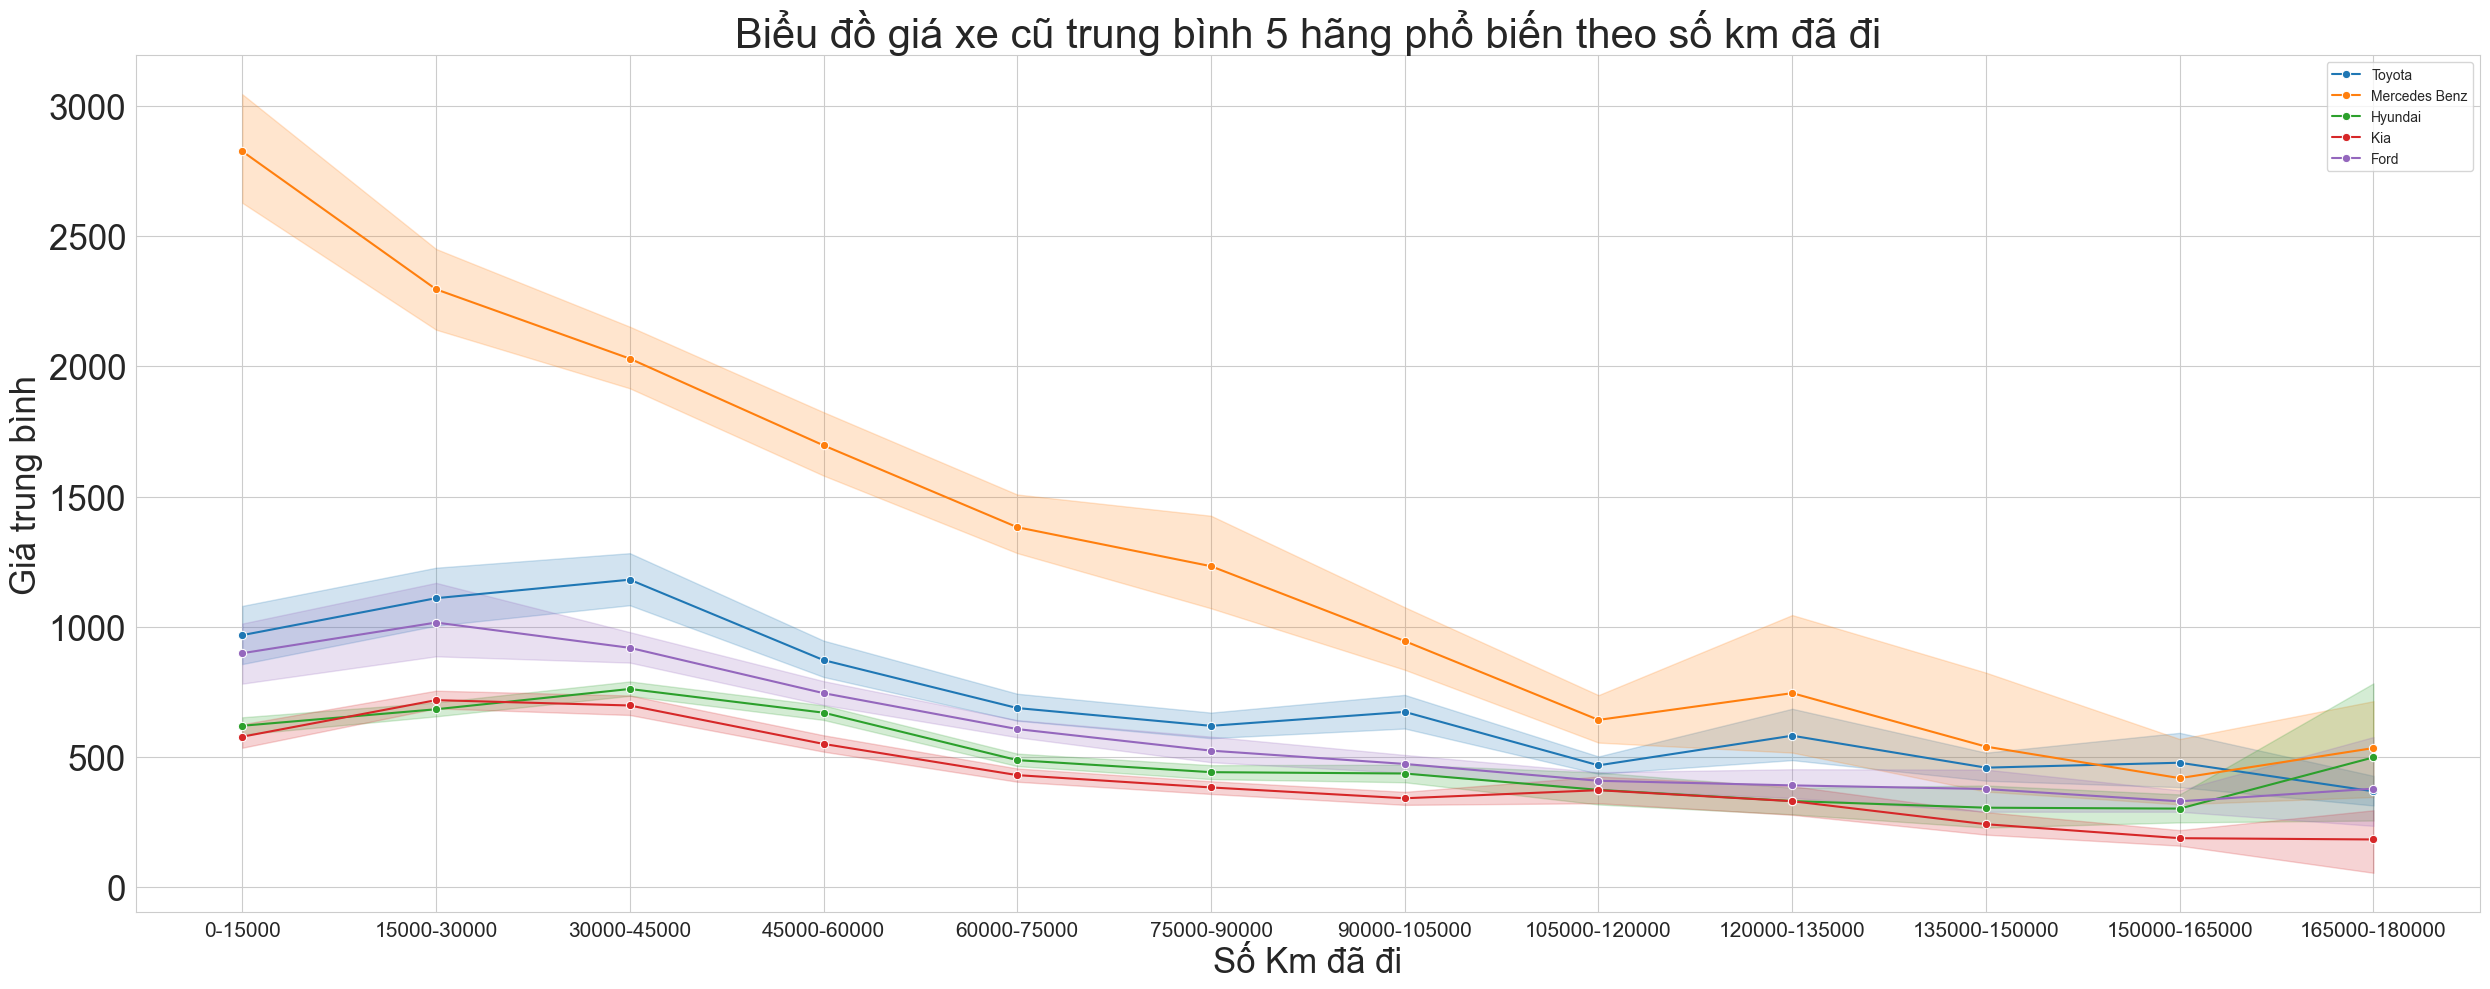

In [51]:
km_range = np.arange(0, 2e5+1, 1.5e4)

order = helpper.utilities.get_km_range_order_array(km_range)
car_old = data_clean.loc[data_clean['Tình trạng'] == 'Xe đã dùng']
print(car_old['Hãng xe'].value_counts().head())
top5_brand = car_old['Hãng xe'].value_counts().iloc[:5].index.tolist()

print(top5_brand)

fig, ax = plt.subplots(figsize=(25,10))
for brand in top5_brand:
    car_brand = car_old.loc[car_old['Hãng xe']==brand]

    dftmp_fillmean = pd.DataFrame()
    dftmp_fillmean['Giá'] = car_brand['Giá']
    dftmp_fillmean['Km range'] = car_brand['Số Km đã đi'].apply(helpper.utilities.find_km_range, args=(km_range, ))
    dftmp_fillmean['Km range'] = pd.Categorical(dftmp_fillmean['Km range'], categories=order, ordered=True)
    df_km_range_price_fillmean = dftmp_fillmean.sort_values(by='Km range')

    sns.lineplot(df_km_range_price_fillmean, x='Km range', y='Giá', estimator="mean", marker='o',ax=ax,label=brand)

 
    plt.title('Biểu đồ giá xe cũ trung bình 5 hãng phổ biến theo số km đã đi',size=30)
    plt.xlabel('Số Km đã đi',size=25)
    plt.ylabel('Giá trung bình',size=25)

    plt.xticks(size=15)
    plt.yticks(size=25)
    
    plt.grid(True)
    plt.tight_layout()
    
plt.legend()

- Nhận xét:
    - Biểu đồ cho thấy thấy rằng giá xe cũ giảm dần theo số km đã đi
    - Giá xe của Mercedes Benz mất giá nhanh so với các xe còn lại

- Biểu đồ heatmap cho các biến

<Axes: >

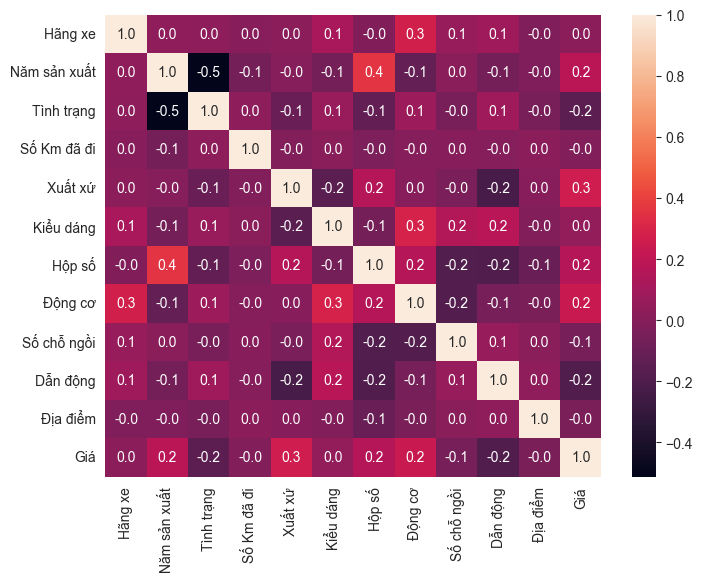

In [52]:
label_encoder = preprocessing.LabelEncoder() 
df_heatplot = data_clean.copy()
df_heatplot['Hãng xe'] = label_encoder.fit_transform(df_heatplot['Hãng xe'])
df_heatplot['Tình trạng'] = label_encoder.fit_transform(df_heatplot['Tình trạng'])
df_heatplot['Xuất xứ'] = label_encoder.fit_transform(df_heatplot['Xuất xứ'])
df_heatplot['Kiểu dáng'] = label_encoder.fit_transform(df_heatplot['Kiểu dáng'])
df_heatplot['Hộp số'] = label_encoder.fit_transform(df_heatplot['Hộp số'])
df_heatplot['Động cơ'] = label_encoder.fit_transform(df_heatplot['Động cơ'])
df_heatplot['Dẫn động'] = label_encoder.fit_transform(df_heatplot['Dẫn động'])
df_heatplot['Địa điểm'] = label_encoder.fit_transform(df_heatplot['Địa điểm'])

plt.figure(figsize=(8,6))
sns.heatmap( df_heatplot.corr(numeric_only=True), annot=True,fmt=".1f")

- Nhận xét:
    - Biểu đồ cho thấy sự tương quan giữa các biến, và đặc trưng xuất xứ định đến giá nhiều nhất 

- Biểu đồ phân phối thể hiện mối quan hệ giữa xuất xứ, năm sản xuất và hộp số quyết định đến giá

(2010.0, 2024.0)

<Figure size 1500x600 with 0 Axes>

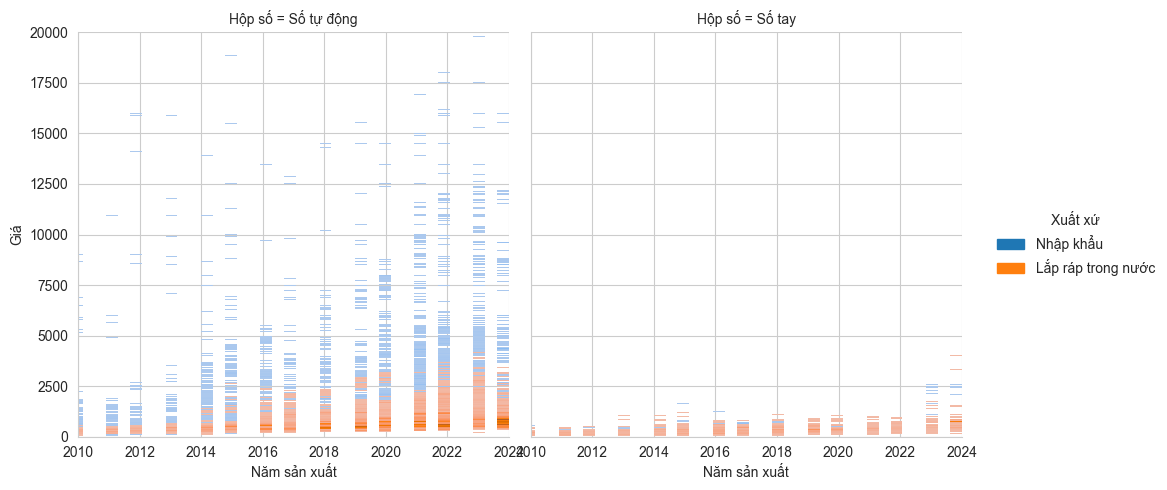

In [53]:
plt.figure(figsize=(15,6))
sns.displot(data=data_clean,x='Năm sản xuất',y='Giá', hue='Xuất xứ',col='Hộp số')
plt.ylim(0,20000)
plt.xlim(2010,2024)

- Nhận xét:
    - Xe trên thị trường hiện nay chủ yếu là xe có hộp số tự động
    - Xe có xuất xứ nhập khẩu có giá lớn hơn khoảng 3 lần so với xe được lắp ráp trong nước
    - Xe có hộp số tự động nhập khẩu tăng mạnh qua các năm, còn có hộp số là sổ tay thì chủ yếu lắp ráp trong nước và ít quyết định đến giá xe qua các năm

### Ảnh hưởng của số km đã đi lên giá

- Tiền xử lí

In [54]:
# Tạo cột mới gán bằng cột Số Km đã đi
data_clean['Số Km đã đi fill mean'] = data_clean['Số Km đã đi']

# Fill ngoại lệ (Xe cũ nhưng 0 km bằng mean value)
data_clean.loc[(data_clean['Tình trạng'] == 'Xe đã dùng') & (data_clean['Số Km đã đi fill mean'] == 0), 'Số Km đã đi fill mean'] = data_clean['Số Km đã đi'].mean()

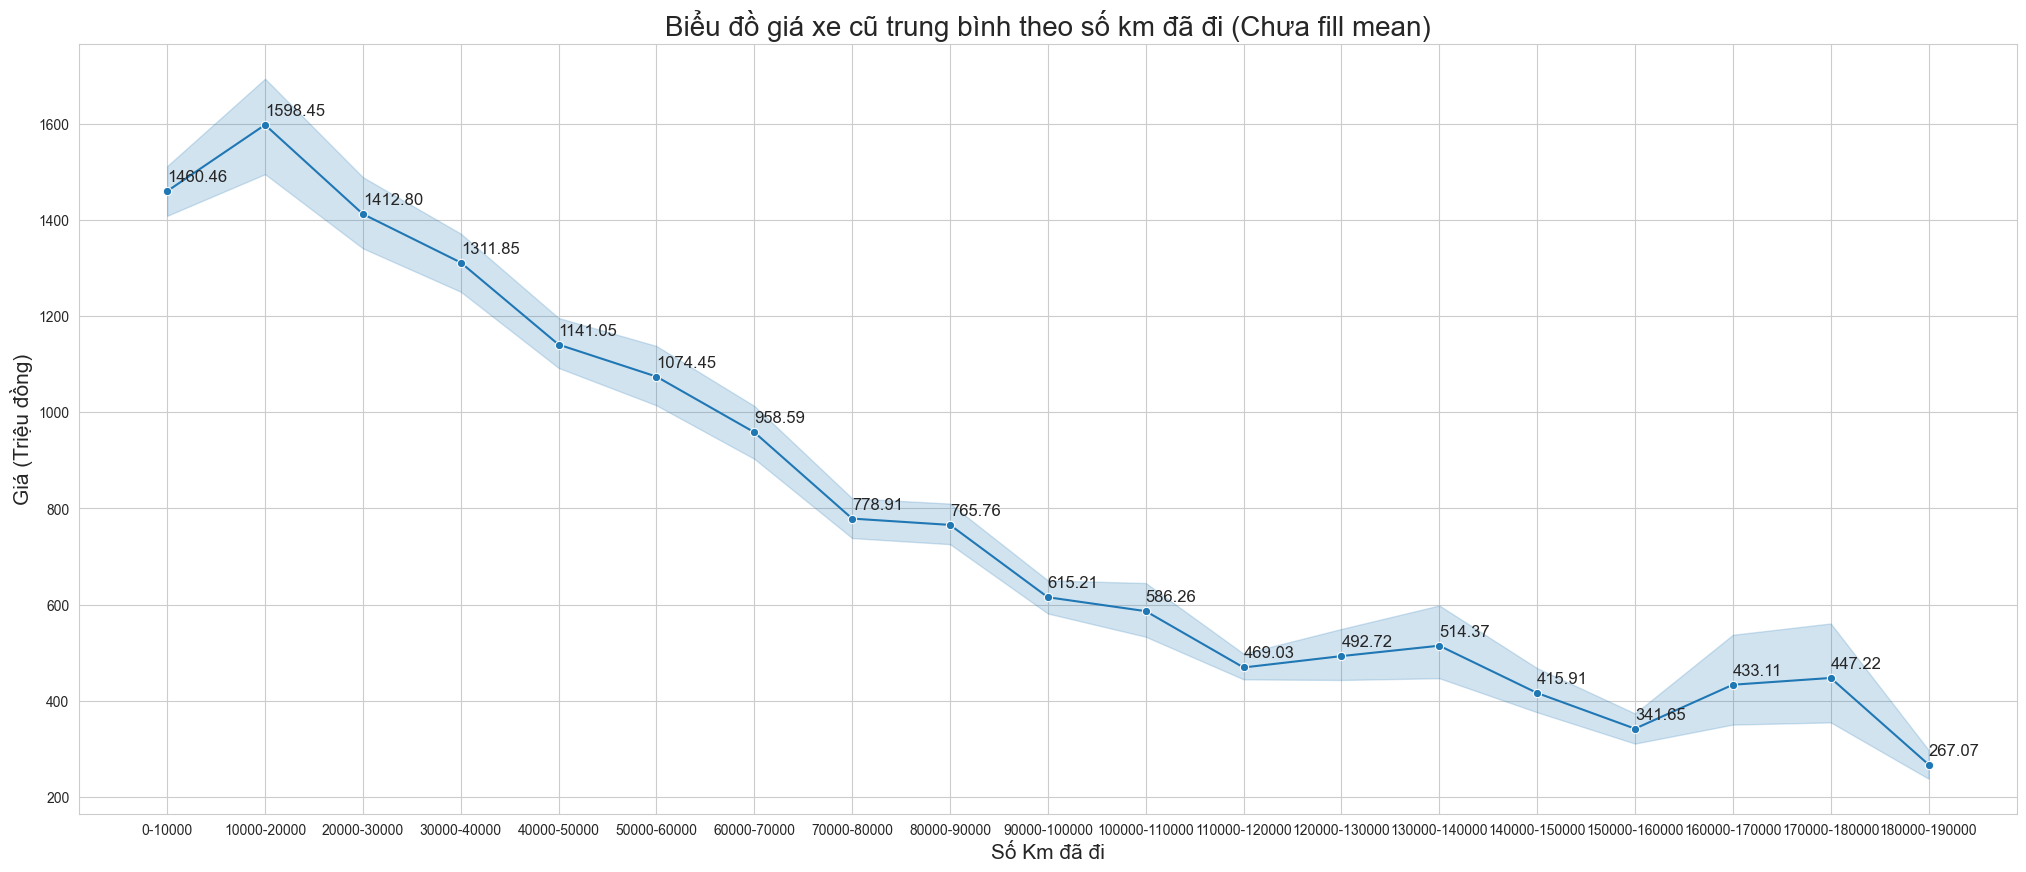

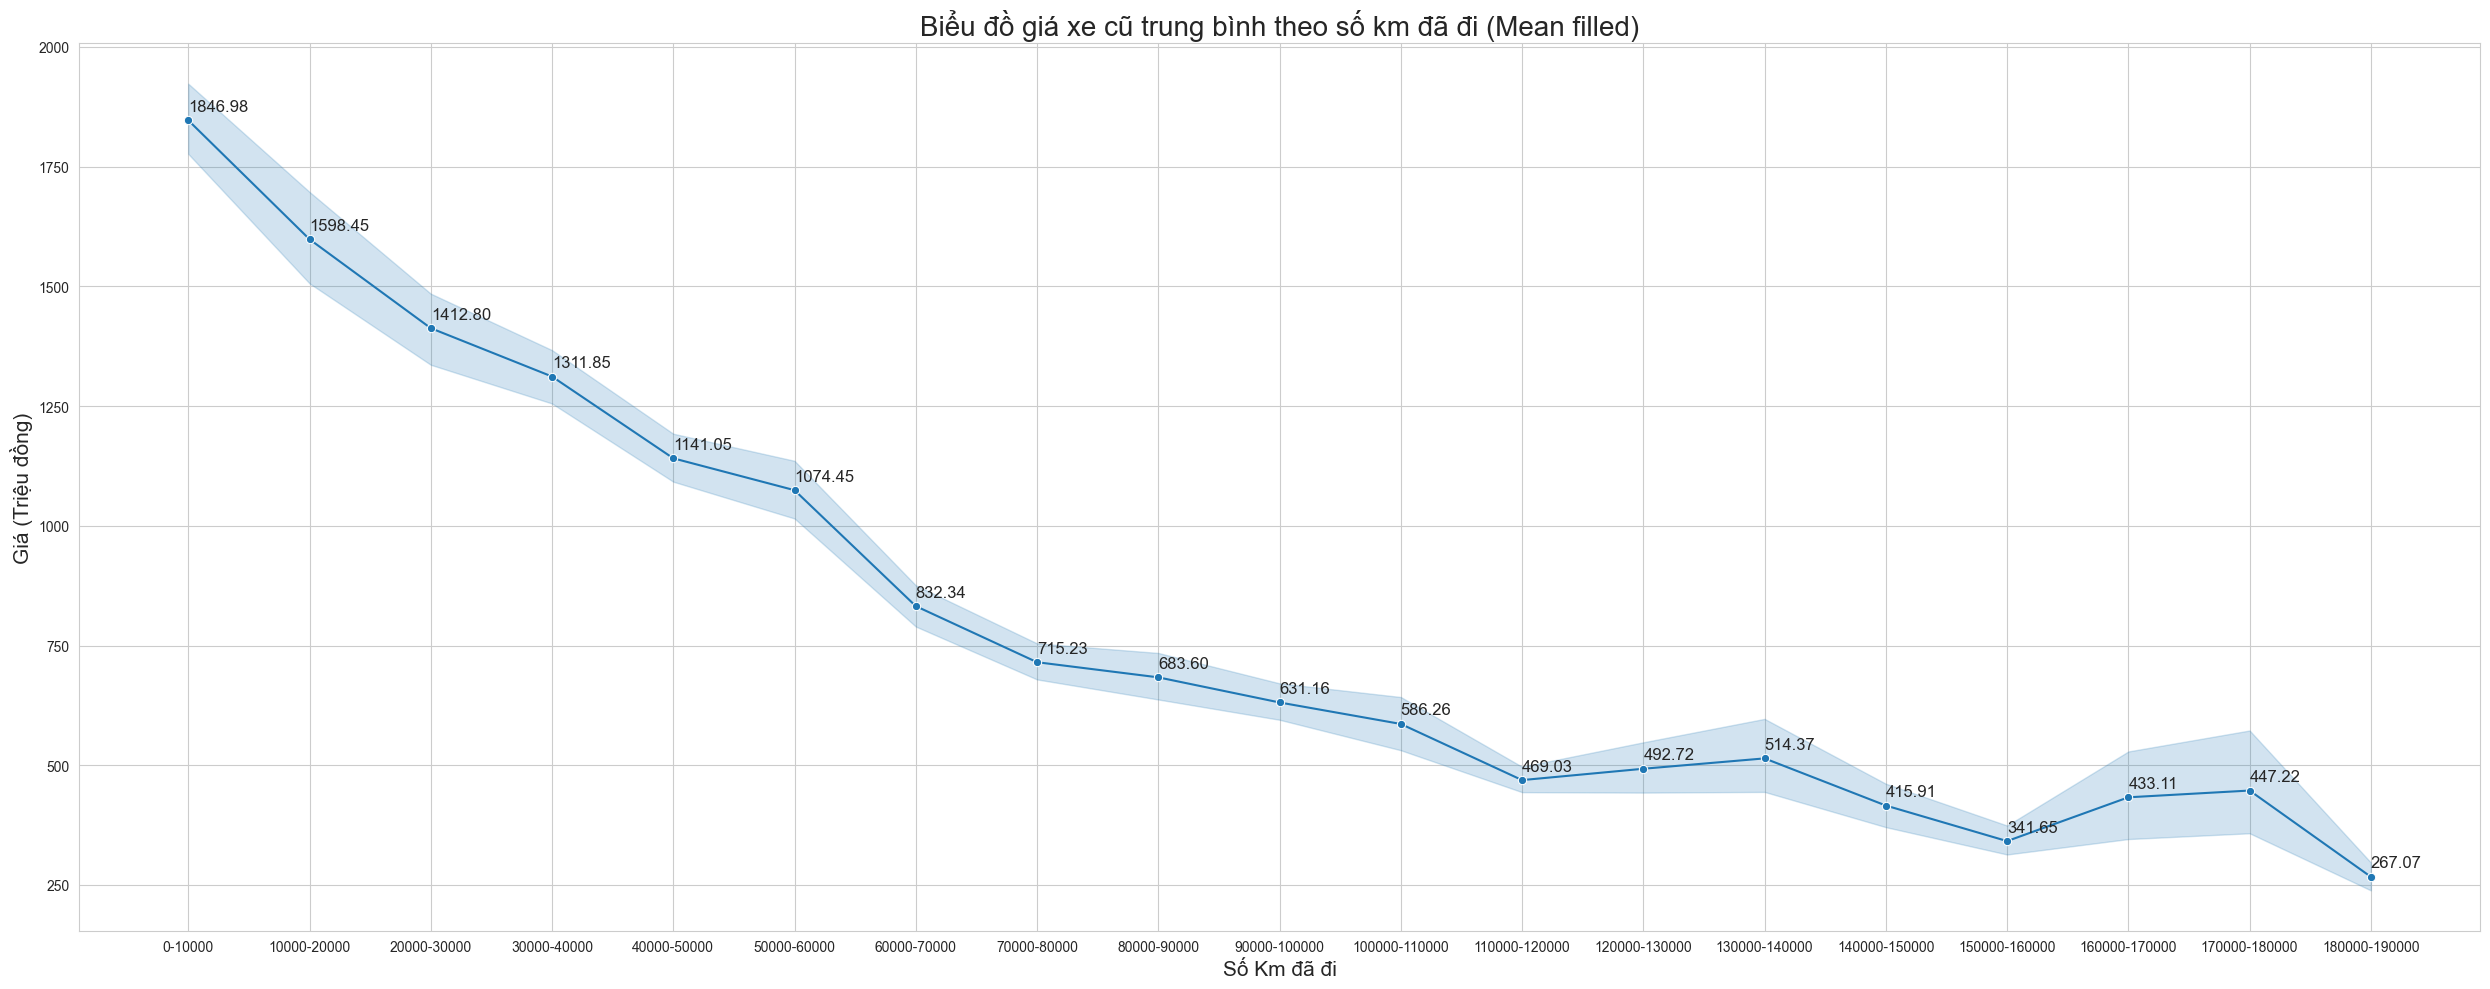

In [55]:
#===================================PLOT TRƯỚC KHI FILL MEAN=============================================
df = pd.read_csv("clean data.csv")
km_range = np.arange(0, 2e5 + 1, 1e4)
order = helpper.utilities.get_km_range_order_array(km_range)

dftmp = pd.DataFrame()
dftmp['Giá'] = df['Giá']
dftmp['Km range'] = df['Số Km đã đi'].apply(helpper.utilities.find_km_range, args=(km_range, ))

dftmp['Km range'] = pd.Categorical(dftmp['Km range'], categories=order, ordered=True)
df_km_range_price = dftmp.sort_values(by='Km range')

plt.figure(figsize=(25, 10))
plot = sns.lineplot(df_km_range_price, x='Km range', y='Giá', estimator='mean', marker='o')
for line in plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y + 20, f'{y:.2f}', size='large')

plt.grid(True)
plt.title('Biểu đồ giá xe cũ trung bình theo số km đã đi (Chưa fill mean)', size = 20)
plt.xlabel('Số Km đã đi', size = 15)
plt.ylabel('Giá (Triệu đồng)', size = 15)



#===================================PLOT SAU KHI FILL MEAN=============================================

dftmp_fillmean = pd.DataFrame()
dftmp_fillmean['Giá'] = data_clean['Giá']
dftmp_fillmean['Km range'] = data_clean['Số Km đã đi fill mean'].apply(helpper.utilities.find_km_range, args=(km_range, ))

dftmp_fillmean['Km range'] = pd.Categorical(dftmp_fillmean['Km range'], categories=order, ordered=True)
df_km_range_price_fillmean = dftmp_fillmean.sort_values(by='Km range')

plt.figure(figsize=(25, 10))
plot = sns.lineplot(df_km_range_price_fillmean, x='Km range', y='Giá', estimator='mean', marker='o')

for line in plot.lines:
    for x, y in zip(line.get_xdata(), line.get_ydata()):
        plt.text(x, y + 20, f'{y:.2f}', size='large')


plt.title('Biểu đồ giá xe cũ trung bình theo số km đã đi (Mean filled)', size = 20)
plt.xlabel('Số Km đã đi', size = 15)
plt.ylabel('Giá (Triệu đồng)', size = 15)

plt.grid(True)
plt.tight_layout()

##### Nhận xét
+ Ở cả 2 đồ thị, giá xe nhìn chung giảm dần theo số km đã đi
+ Trước khi fill những giá trị trống thì ở 0 km giá thấp (Nguyên nhân là do trước khi xử lí thì có những xe cũ giá thấp nhưng số km đã đi là 0km)

### Ảnh hưởng hãng xe lên giá

- Tiền xử lí

In [56]:
#Trim khoảng giá
lower_limit = data_clean['Giá'].quantile(0.05)
upper_limit = data_clean['Giá'].quantile(1)

df_clean_tmp = data_clean[(data_clean['Giá'] >= lower_limit) & (data_clean['Giá'] <= upper_limit)]

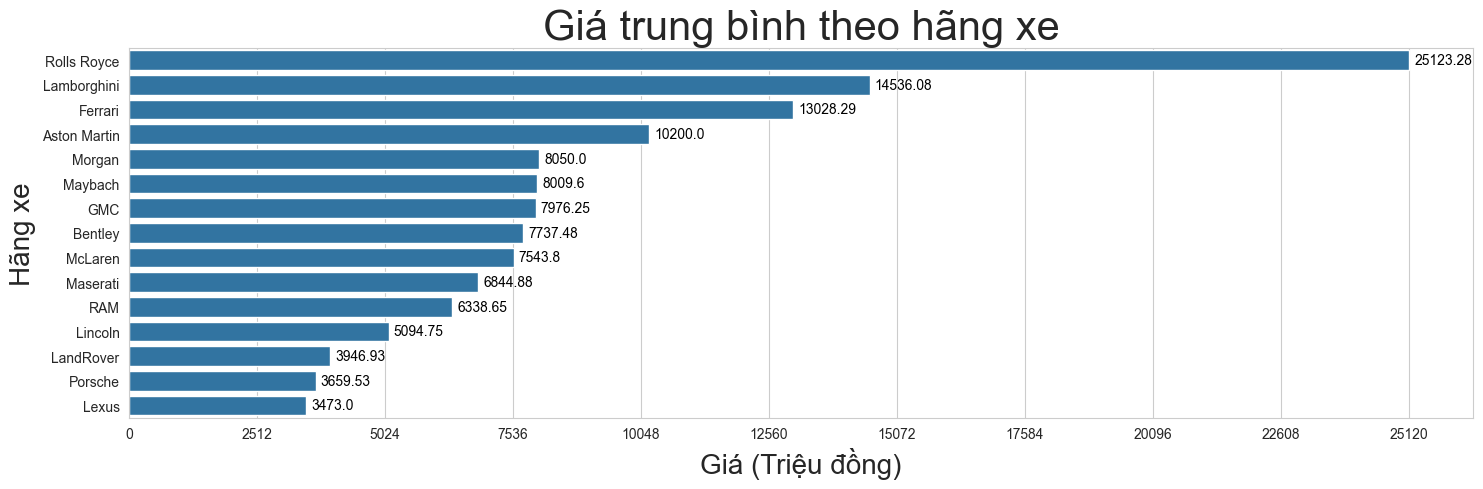

In [57]:
#Tính giá trung bình
sr_brand = df_clean_tmp.groupby('Hãng xe')['Giá'].mean().sort_values(ascending=False).head(15)

#Plot
plt.figure(figsize=(15, 5))

sns.set_style("whitegrid")

ax = sns.barplot( x=sr_brand.values, y=sr_brand.index)

for i, v in enumerate(sr_brand.values):
    ax.text(v + 100, i, str(round(v,2)), color='black', va='center')

max_val = int(max(sr_brand.values))
step_size = round(max_val / 10)
plt.xticks(range(0, max_val + 1, step_size))


plt.title('Giá trung bình theo hãng xe', fontsize=30)
plt.xlabel('Giá (Triệu đồng)', fontsize=20)
plt.ylabel('Hãng xe', fontsize=20)

plt.tight_layout()
plt.show()

##### Nhận xét
- Giá xe có sự ảnh hưởng nhiều bởi hãng xe
- Các hãng xe có giá cao nhất là Rolls Royce, Lamborghini, Ferrari, Aston Martin, ...


### Giá trung bình theo động cơ và xuất xứ

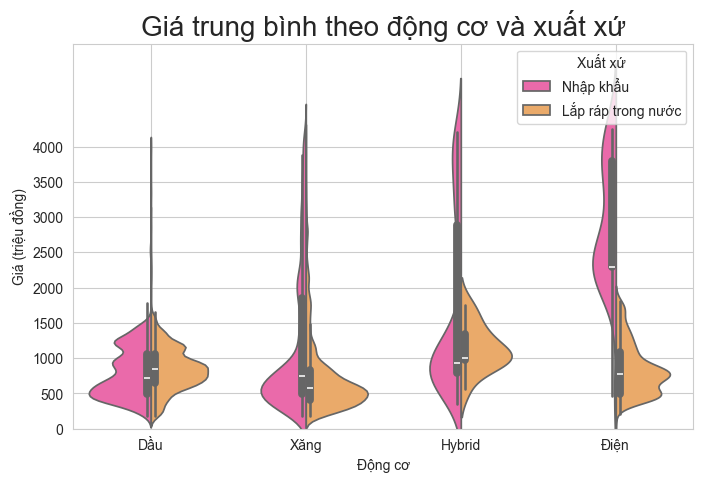

In [58]:
df_tmp = pd.DataFrame
df_tmp = data_clean
df_tmp['Động cơ'] = data_clean['Động cơ'].str.split().str[0]
df_tmp = df_tmp.groupby(['Động cơ', 'Xuất xứ'])['Giá'].mean()

df_reset = data_clean.reset_index()

#Trim khoảng giá
start_trim = df_reset['Giá'].quantile(0.05)
end_trim = df_reset['Giá'].quantile(0.95)

df_reset_trimmed = df_reset[(df_reset['Giá'] >= start_trim) & (df_reset['Giá'] <= end_trim)]

plt.figure(figsize=(8, 5))

sns.violinplot(data=df_reset_trimmed, x='Động cơ', y='Giá', hue='Xuất xứ', split=True, palette='spring')

plt.ylabel('Giá (triệu đồng)')

plt.title('Giá trung bình theo động cơ và xuất xứ', size = 20)

plt.grid(True)
plt.yticks(np.arange(0, df_reset_trimmed['Giá'].max(), 500))
plt.ylim(0)
plt.show()

##### Nhận xét
+ Tổng quan xe nhập khẩu có giá cao hơn xe lắp ráp trong nước
+ Xe điện nhập khẩu có giá cao hơn đáng kể so với xe điện lắp ráp trong nước
+ Trong tất cả các loại động cơ, xe hybrid có giá trung bình cao nhất, tiếp theo là xe điện, xe xăng và xe dầu.

### Giá trung bình theo kiểu dáng và hãng

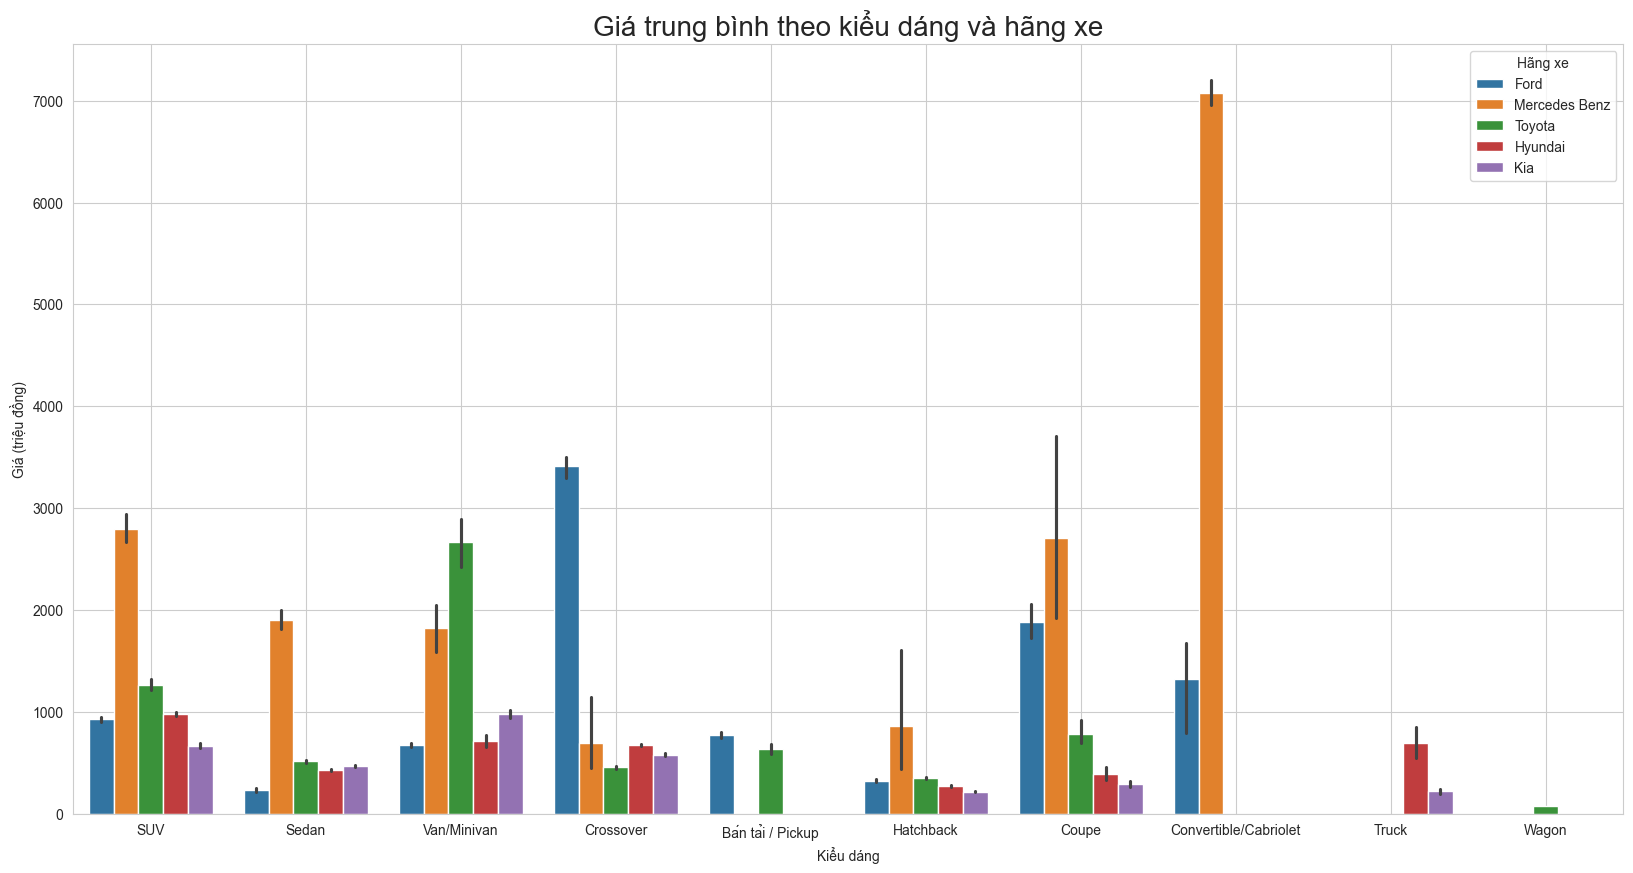

In [62]:

top_brands = data_clean['Hãng xe'].value_counts().nlargest(5).index

# Filter the DataFrame for these brands
df_top_brands = data_clean[data_clean['Hãng xe'].isin(top_brands)]

plt.figure(figsize=(20, 10))
ax = sns.barplot(data=df_top_brands, x='Kiểu dáng', y='Giá', hue='Hãng xe')

plt.title('Giá trung bình theo kiểu dáng và hãng xe', size = 20)
plt.ylabel('Giá (triệu đồng)', size = 15)
plt.xlabel('Kiểu dáng', size = 15)

plt.grid(True)
plt.show()

##### Nhận xét
+ Nhìn chung xe mercedes có giá cao nhất ở 4 kiểu dáng suv, sedan, hatchback, couple và convertible/cabriolet
+ Xe bán tải chỉ có 2 hãng Toyota và Ford với giá khoảng 700 triệu
+ Toyota có giá đắt nhất trong kiểu xe van/minivan

## Kết luận
- Dự án dự báo giá của xe ô tô cũ thuộc về loại bài toán regression
- Biến mục tiêu cuối cùng của dự án là giá xe được dự đoán khi có được giá trị các trường khác như Năm sản xuất, hãng xe, Kiểu dáng, số Km đã đi,...
- Từ các đồ thị trên ta có thể rút ra được giá xe bị ảnh hưởng, phụ thuộc nhiều bởi các biến Hãng, Số Km đã đi, Xuất xứ, Hộp số
- Giá xe ít bị ảnh hưởng bởi các trường như ngày đăng, địa điểm, số chỗ ngồi

